# Medical Cost Personal Insurance Project

### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.
#### Columns                                            
•	age: age of primary beneficiary                                                                                             
•	sex: insurance contractor gender, female, male                                                                            
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,        objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.                      
•	children: Number of children covered by health insurance / Number of dependents                                             
•	smoker: Smoking                                                                                                             
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.                           
•	charges: Individual medical costs billed by health insurance                                                      

Predict :  Can you accurately predict insurance costs?

#### Dataset Link-
https://github.com/dsrscientist/dataset4                                                                           
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [1]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("medical_cost_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Dataset has 1338 rows and 7 columns. Name of the Columns are age,sex,bmi,children,smoker,region and charges. Here column charges is the target variable and other columns are the features(independent variables). It is a regression problem.

In [4]:
# first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### EDA

In [6]:
# checkig dimension of the dataset
df.shape
print('Total number of rows-',df.shape[0],'\nTotal number of columns-',df.shape[1])

Total number of rows- 1338 
Total number of columns- 7


In [7]:
# checking the types of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The columns of the dataset contain three types of data int64, object and float64.

In [8]:
# dividing columns in two parts categorical columns and numeriacl columns.
cat_columns = []
num_columns = []
for i in df.columns:
    if df[i].dtypes=="object":
        cat_columns.append(i)
    else:
        num_columns.append(i)
print('categorical columns - ',cat_columns)
print('numerical columns - ',num_columns)

categorical columns -  ['sex', 'smoker', 'region']
numerical columns -  ['age', 'bmi', 'children', 'charges']


In [9]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total null values in dataset -  0


Dataset has no null values

In [10]:
# lets check all information at one place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


here we can see index range,total number of columns,columns name,columns data type,null values and memory usage

In [11]:
# lets check the total unique value in target variable
df['charges'].nunique()

1337

charges column has 1337 unique values.

In [12]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('number of unique value in',i,'column -',df[i].nunique())
        print(dataframe[i].value_counts())
        print('\n')    

In [13]:
value_count(df)

number of unique value in age column - 47
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


number of unique value in sex column - 2
male      676
female    662
Name: sex, dtype: int64


number of unique value in bmi column - 548
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


number of unique value in children column - 6
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


number of unique value in smoker column - 2
no     1064
ye

children column has only 6 unique values 0,1,2,3,4, and 5. we can consider it as a categorical column

In [14]:
# lets check the duplicate rows in dataset
df.duplicated().sum()

1

Dataset has 1 duplicate row

In [15]:
# checking duplicate row details
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
# removing duplicate row
df = df.drop_duplicates()

In [17]:
# lets confirm duplicate row has removed
df.duplicated().sum()

0

In [18]:
# lets check the dataset after removing duplicate row
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Duplicate row has removed. Now need to reset indices.

In [19]:
# reset the indices
df.reset_index(inplace=True,drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


After removing the duplicate row we have total 1337 rows and 7 columns.

In [20]:
# description of dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Here we can see that statistical description of numerical columns                                                               
1) The count is same for all columns means no null values present.                                                           
2) since charges column is the target variable and children column contains categorical data no need to check outliers and skewness for them                                  
3) column age is almost normally distributed.It has not skewness and outliers                                                  
4) column bmi is almost normally distributed.It has not skewness. After checking the difference between 75% and max I can say that it has outliers

In [21]:
# checking description of categorical columns
df.describe(include=[object])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


here count is same for all columns means no null values present.

### Data visualization

In [22]:
def plot(name):
    plt.figure(figsize = (20,16), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 20:
            ax = plt.subplot(4 , 4 , plotnumber)
            plot_name(df[i],color='green')
            plt.xlabel(i, fontsize = 12)
            plotnumber +=1
    plt.show()

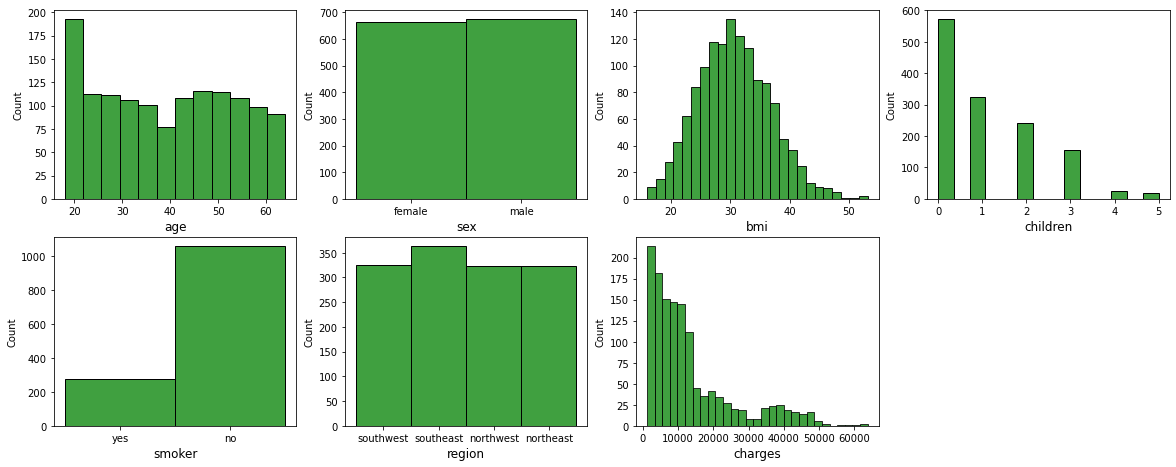

In [23]:
# histogram plot
plot_name = sns.histplot
plot(df)

<AxesSubplot:xlabel='sex', ylabel='count'>

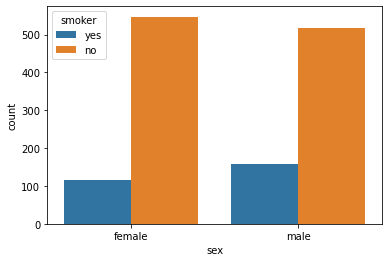

In [24]:
sns.countplot(data=df,x='sex',hue='smoker')

the number of male who smoke is higher than female

<AxesSubplot:xlabel='region', ylabel='count'>

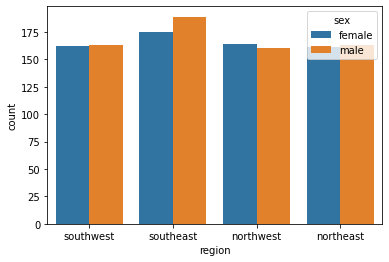

In [25]:
sns.countplot(data=df,x='region',hue='sex')

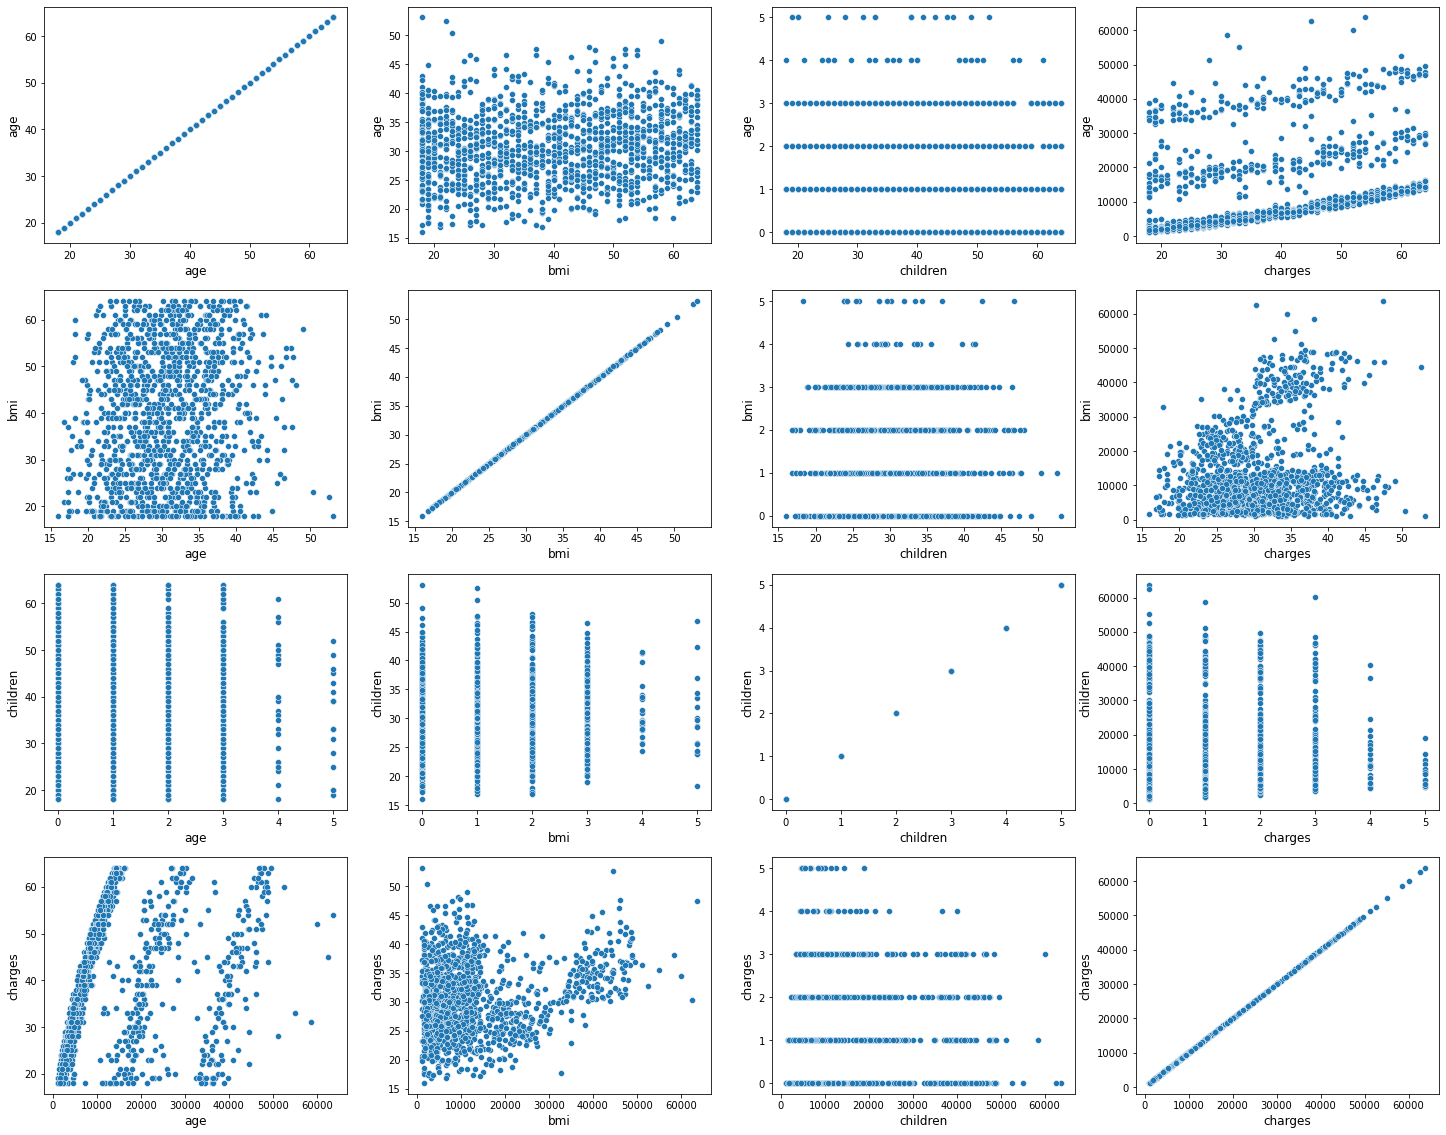

In [26]:
# scatter plot
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in num_columns:
    for i in num_columns:
        if plotnumber <= 20:
            plt.subplot(4,4,plotnumber)
            sns.scatterplot(df[column],df[i],data=df)
            plt.ylabel(column, fontsize=12)
            plt.xlabel(i, fontsize=12)
        plotnumber+=1
plt.show()    

here we can see the relationship between feature and feature and feature and target variable

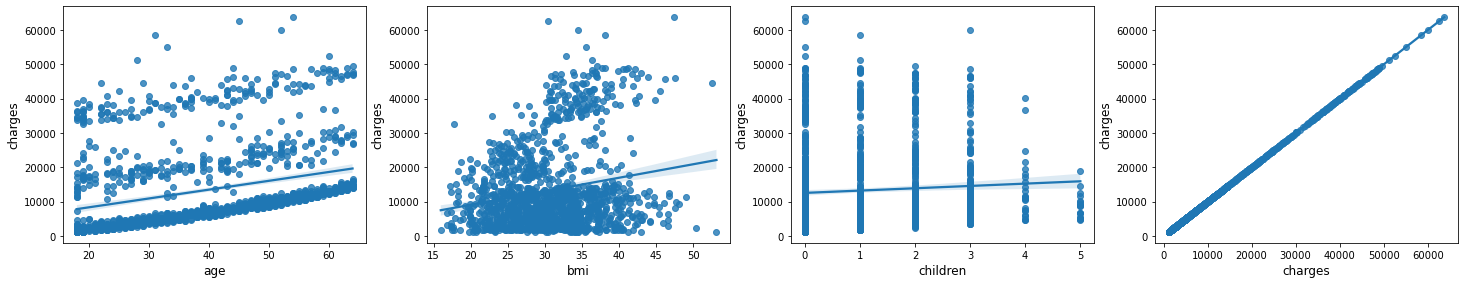

In [27]:
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in num_columns:
        if plotnumber <= 20:
            plt.subplot(4,4,plotnumber)
            sns.regplot(df[column],df['charges'],data=df)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('charges', fontsize=12)
        plotnumber+=1
plt.show()    

here we can see the positive relationship between features and target variable

<AxesSubplot:xlabel='charges', ylabel='Count'>

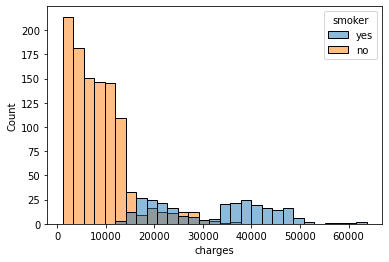

In [28]:
# relationship between charges and smoker
sns.histplot(df,x='charges',hue='smoker')

Here we can see that charges for non-smokers are less than the smokers

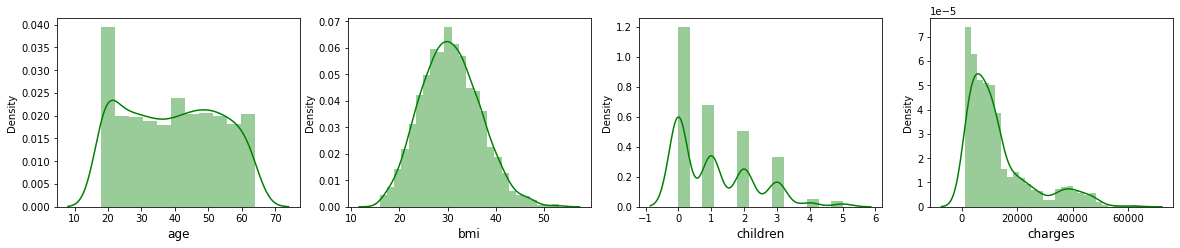

In [29]:
# checking skewness
plot_name = sns.distplot
plot(num_columns)

since column charges is the target variable and column children has categorical data we do not need to check skewness and outliers. columns age and bmi are almost normally distributed.


In [30]:
# checking skewness
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

bmi skewness is in the acceptable range. Children is the categorical data and charges is the target variable

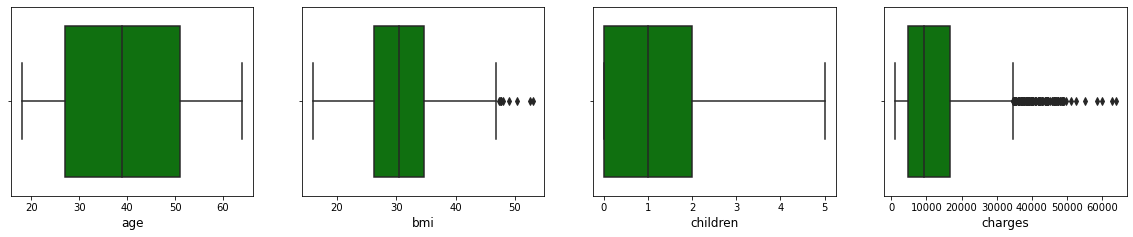

In [31]:
# checking outliers
plot_name = sns.boxplot
plot(num_columns)

bmi and charges have outliers.Here charges is the target variable. Normal range of bmi is 18.5 to 24.9. Less than 18.5 bmi fall within underweight range. Overweight person bmi range is fall within 25 to 29.9. if person bmi is 30 or higher,it fall within the obesity range. Obesity is a disease. In our dataset, some people may have bmi in the obesity range. So I will continue with outliers.

In [32]:
# encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in cat_columns:
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1332,50,1.0,30.970,3,0.0,1.0,10600.54830
1333,18,0.0,31.920,0,0.0,0.0,2205.98080
1334,18,0.0,36.850,0,0.0,2.0,1629.83350
1335,21,0.0,25.800,0,0.0,3.0,2007.94500


In [33]:
# checking correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


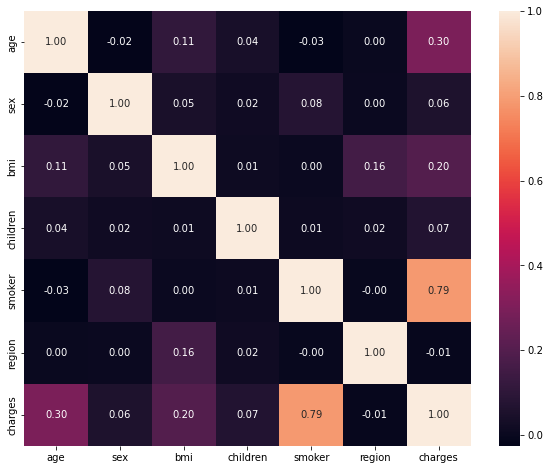

In [34]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

smoker and charges have positive relation

In [35]:
# separating columns
x = df.drop(columns = ['charges'])                 # features
y = df['charges']                                  # target variable

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [37]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [38]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,age,1.015323
1,sex,1.008923
2,bmi,1.040634
3,children,1.002412
4,smoker,1.006557
5,region,1.025976


here we can see that features are not correlated

In [39]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [40]:
# finding best random state
def random_state(model):
    max_acc = 0
    max_rs = 0
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = r2_score(y_test,y_pred)
        if acc>max_acc:
            max_acc=acc
            max_rs = i
    print('maximum accuracy=',max_acc,'\nbest random state=',max_rs)

In [41]:
random_state(LinearRegression())

maximum accuracy= 0.8000168887606639 
best random state= 113


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=113)

In [43]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
LS = Lasso()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,LS,DTR,GBR,KNN,ETR,svr]

In [44]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    train_pred = name.predict(x_train)
    score_r2 = r2_score(y_test,y_pred)
    train_score = r2_score(y_train,train_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x,y)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [45]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.8000168887606639 
r2 score on training data = 0.7254343031438875 
Mean absolute error = 3894.390824926221 
Mean squared error = 31774168.780917607 
Root mean squared error = 5636.858059319714

Cross validation:-

cross validation scores:- [0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ] 
cross validation mean score:- 0.7471285330088385 
Difference between r2 score and cross validation mean score = 5.288835575182538

__________________ Using RandomForestRegressor() _________________

r2 score = 0.8703172291110968 
r2 score on training data = 0.974273154281163 
Mean absolute error = 2626.8865079135994 
Mean squared error = 20604551.17767253 
Root mean squared error = 4539.22363159963

Cross validation:-

cross validation scores:- [0.85443993 0.77498011 0.86568107 0.83199283 0.85115454] 
cross validation mean score:- 0.8356496967261068 
Difference between r2 score and cross validation mean score = 3.46675

   Our best model is KNeighborsRegressor

#### Hyperparameter tuning

In [46]:
# parameters for KNN models
param = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16],
         'algorithm':['auto','ball_tree','kd_tree','brute'],
         'leaf_size':[3,4,5,6,7,8,9,10,11,15]
          }

GSCV= GridSearchCV(estimator=KNN,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8, 9, 10, 11, 15],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16]})

In [47]:
# finding best parameter value
GSCV.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [48]:
# using best parameter value
Model = KNeighborsRegressor(n_neighbors=13,algorithm='ball_tree',leaf_size=15)

In [49]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
score_r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2 score =',score_r2,'\nMean absolute error =',MAE,'\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)

r2 score = 0.8396794758571611 
Mean absolute error = 3105.20432268982 
Mean squared error = 25472407.952805936 
Root mean squared error = 5047.019709968045


In [50]:
# saving model
import pickle
pickle.dump(Model,open('Medical_cost_insurance_prediction.pkl','wb'))